In [2]:
import sys
import os
sys.path.append(os.path.abspath("C:/Users/juani/OneDrive/Escritorio/Facultad/TD8FINAL/TD8"))
from heuristicas.grid_heuristic import grid_heuristic, solve
from lectura_and_analisis.xml_parsing import xml_data_extractor
from lectura_and_analisis.analisis import calculate_area
from lectura_and_analisis.generacion_mapa import fun_generacion_mapa
from lectura_and_analisis.optimization_functions import change_dimensions, optimize_area
from lectura_and_analisis.rotation import *
from heuristicas.septima_heuristica import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
arr = np.array([4.0, 5.0])
print(arr)

[4. 5.]


In [5]:
def fun_generacion_mapa(yacimiento_coords, restricciones_data, rectangles, rect_size, angle):
    # Plotting the extracted data
    plt.figure(figsize=(10, 8))

        # Plot Yacimiento (main polygon)
    if yacimiento_coords:
        # Create and fill the polygon with translucent blue, no border
        yacimiento_polygon = patches.Polygon(
            yacimiento_coords,
            closed=True,
            facecolor='lightblue',
            edgecolor='none',
            alpha=0.5  # Adjust alpha for transparency
        )
        plt.gca().add_patch(yacimiento_polygon)



    # Plot Restricciones (obstacle polygons)
    for restriccion in restricciones_data:
        if restriccion:
            restriccion_x, restriccion_y = zip(*restriccion)
    
            # Plot the restriction outline with small dots
            plt.plot(restriccion_x, restriccion_y, 'ro-', markersize=1)
    
            # Fill the restriction polygon with translucent red
            restriccion_polygon = patches.Polygon(restriccion, closed=True, color='red', alpha=0.5)
            plt.gca().add_patch(restriccion_polygon)



    # Plot Pads as rectangles with rotation around the center
    for n in range(len(rectangles)):
        print(rectangles[n])
        for i, rect in enumerate(rectangles[n]):
            if rect:  # Ensure the rectangle data is not empty
                width, height = rect_size[n]
                # Expecting rect to be a tuple or list: (center_x, center_y)
                center_x, center_y = rect
                # Calculate the bottom left corner based on the center and width/height
                bottom_left_x = center_x - width / 2
                bottom_left_y = center_y - height / 2

                # Create a rectangle patch with the given width, height, angle, and centered at the (center_x, center_y)
                rectangle = patches.Rectangle(
                    (bottom_left_x, bottom_left_y), 
                    width, 
                    height, 
                    angle=angle,
                    rotation_point = 'center', 
                    edgecolor='darkblue',      # Dark blue border
                    facecolor='darkblue',    # Light blue fill
                    linewidth=2,              # Border thickness
                    alpha=0.3,                # Transparency for the fill
                )

                # Add the rectangle to the plot
                plt.gca().add_patch(rectangle)

                # Plot the center of the rectangle as a dark blue dot
                plt.plot(center_x, center_y, 'o', color='darkblue', markersize=5, label='Center' if i == 0 else "")

    


    # Optionally, you can plot Semilla (Pads) information as rectangles or points
    # Here, we'll plot them as points
    # Plot Pads as rectangles
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Yacimiento, Semilla, and Restricciones Visualization')
    plt.legend()
    plt.axis('equal')


    # Display the plot
    plt.grid(True)
    plt.show()

C:\Users\juani\AppData\Local\Temp\ipykernel_14360\3398929366.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


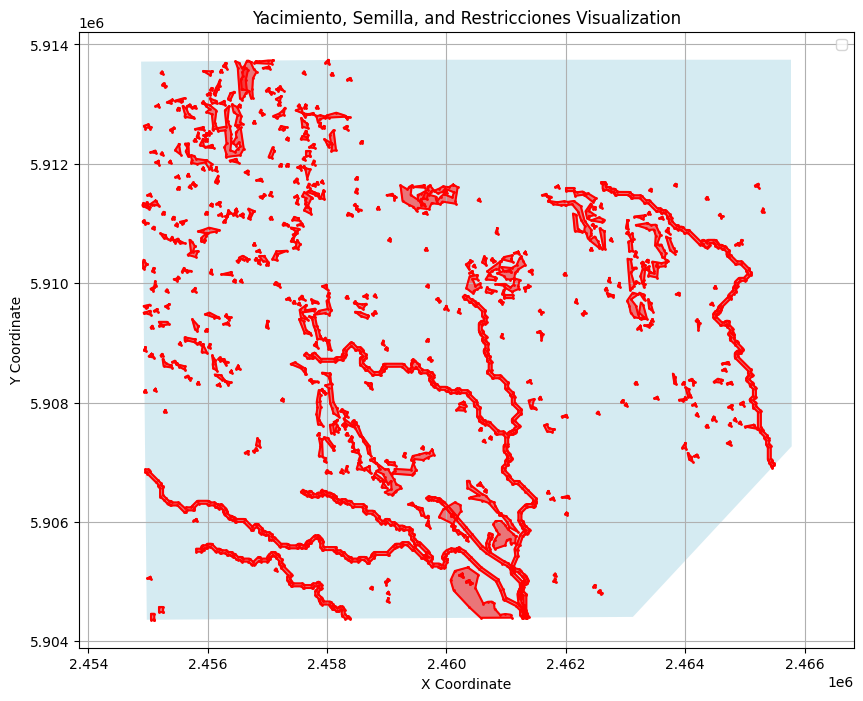

[(10.8, 31.900000000000002), (7.0, 3.4)]


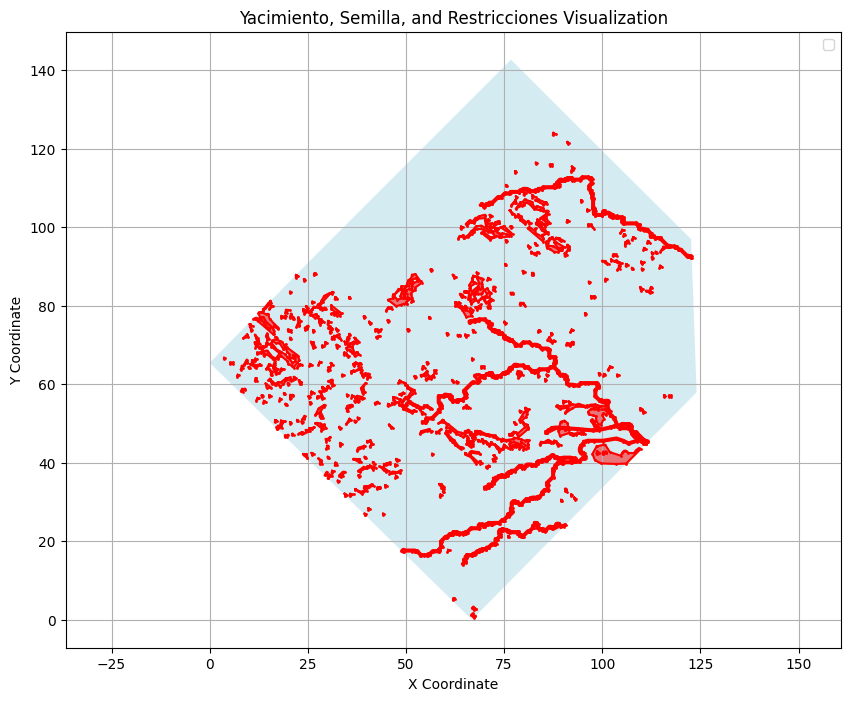

In [6]:
filepath = "C:/Users/juani/OneDrive/Escritorio/Facultad/TD8FINAL/TD8/mapas/Entrada_v2.xml"
polygon, panel_size, restrictions, angle = xml_data_extractor(filepath)
fun_generacion_mapa(polygon, restrictions, [], panel_size, 0)
rotated_polygon, rotated_restrictions, translation_vector = rotation(polygon, restrictions, 45)
reduced_polygon, reduced_size, reduced_restrictions, _ = change_dimensions(rotated_polygon, panel_size, rotated_restrictions, 0.01, [])
print(reduced_size)
fun_generacion_mapa(reduced_polygon, reduced_restrictions, [], reduced_size, 0)

reduction = 0.05

In [7]:
#sol = [(169.0, 280.75), (223.0, 280.75), (223.0, 440.25), (277.0, 280.75), (277.0, 440.25), (331.0, 121.25), (331.0, 280.75), (331.0, 440.25), (385.0, 280.75), (385.0, 440.25), (385.0, 599.75), (439.0, 280.75), (439.0, 440.25), (493.0, 280.75), (493.0, 440.25), (547.0, 440.25)]
#sol = [(190.0, 249.75), (191.0, 409.25), (244.0, 249.75), (245.0, 409.25), (298.0, 249.75), (299.0, 409.25), (352.0, 249.75), (353.0, 409.25), (354.0, 568.75), (406.0, 249.75), (407.0, 409.25), (408.0, 568.75), (460.0, 249.75), (461.0, 409.25), (515.0, 409.25), (569.0, 409.25)]
#sol = [(201.0, 245.75), (205.0, 405.25), (255.0, 245.75), (259.0, 405.25), (309.0, 245.75), (313.0, 405.25), (363.0, 245.75), (367.0, 405.25), (371.0, 564.75), (417.0, 245.75), (421.0, 405.25), (425.0, 564.75), (471.0, 245.75), (475.0, 405.25), (529.0, 405.25), (583.0, 405.25)]
sol = [(196.0, 241.75), (204.0, 401.25), (250.0, 241.75), (258.0, 401.25), (304.0, 241.75), (312.0, 401.25), (358.0, 241.75), (366.0, 401.25), (374.0, 560.75), (412.0, 241.75), (420.0, 401.25), (428.0, 560.75), (466.0, 241.75), (474.0, 401.25), (528.0, 401.25), (582.0, 401.25)]

reduction = 0.01

In [8]:
one = [(29.0, 70.75), (39.800000000000004, 70.75), (49.6, 38.85), (50.6, 70.75), (60.4, 38.85), (61.4, 70.75), (62.4, 102.65), (71.20000000000002, 38.85), (72.20000000000002, 70.75), (73.20000000000002, 102.65), (82.00000000000001, 38.85), (83.00000000000001, 70.75), (84.00000000000001, 102.65), (93.80000000000001, 70.75), (94.80000000000001, 102.65), (104.60000000000001, 70.75), (115.4, 70.75)]
other =  [(29.0, 70.75), (39.800000000000004, 70.75), (49.6, 38.85), (50.6, 70.75), (60.4, 38.85), (61.4, 70.75), (62.4, 102.65), (71.20000000000002, 38.85), (72.20000000000002, 70.75), (73.20000000000002, 102.65), (82.00000000000001, 38.85), (83.00000000000001, 70.75), (84.00000000000001, 102.65), (93.80000000000001, 70.75), (94.80000000000001, 102.65), (104.60000000000001, 70.75), (115.4, 70.75)]
other_ = [(24.0, 65.75), (34.800000000000004, 65.75), (45.6, 65.75), (56.4, 33.85), (56.4, 65.75), (56.4, 97.65), (67.20000000000002, 33.85), (67.20000000000002, 65.75), (67.20000000000002, 97.65), (78.00000000000001, 33.85), (78.00000000000001, 65.75), (78.00000000000001, 97.65), (88.80000000000001, 65.75), (88.80000000000001, 97.65), (99.60000000000001, 65.75), (99.60000000000001, 97.65), (110.4, 65.75)]
four = [(29.0, 70.75), (39.800000000000004, 70.75), (49.6, 38.85), (50.6, 70.75), (60.4, 38.85), (61.4, 70.75), (62.4, 102.65), (71.20000000000002, 38.85), (72.20000000000002, 70.75), (73.20000000000002, 102.65), (82.00000000000001, 38.85), (83.00000000000001, 70.75), (84.00000000000001, 102.65), (93.80000000000001, 70.75), (94.80000000000001, 102.65), (104.60000000000001, 70.75), (115.4, 70.75)]

#esta tiene chiquitos y grandes
small = [(12.5, 59.5), (12.5, 62.9), (12.5, 66.3), (12.5, 69.7), (19.5, 52.7), (19.5, 56.1), (19.5, 59.5), (19.5, 62.9), (19.5, 69.7), (19.5, 73.1), (19.5, 76.5), (19.5, 79.9), (26.5, 45.9), (26.5, 49.300000000000004), (26.5, 52.7), (33.5, 39.1), (33.5, 42.5), (33.5, 45.9), (33.5, 49.300000000000004), (33.5, 52.7), (33.5, 90.1), (33.5, 93.5), (40.5, 32.3), (40.5, 35.7), (40.5, 39.1), (40.5, 42.5), (40.5, 45.9), (40.5, 49.300000000000004), (40.5, 52.7), (40.5, 90.1), (40.5, 93.5), (40.5, 96.9), (40.5, 100.3), (47.5, 90.1), (47.5, 93.5), (47.5, 96.9), (47.5, 100.3), (47.5, 103.7), (47.5, 107.1), (54.5, 18.7), (54.5, 22.099999999999998), (61.5, 11.899999999999999), (61.5, 15.299999999999999), (61.5, 18.7), (68.5, 8.5), (68.5, 11.899999999999999), (68.5, 15.299999999999999), (68.5, 18.7), (68.5, 22.099999999999998), (68.5, 124.1), (68.5, 127.5), (75.5, 15.299999999999999), (75.5, 18.7), (75.5, 22.099999999999998), (75.5, 124.1), (75.5, 127.5), (75.5, 130.89999999999998), (75.5, 134.29999999999998), (82.5, 22.099999999999998), (82.5, 124.1), (82.5, 127.5), (82.5, 130.89999999999998), (89.5, 124.1), (96.5, 35.7), (96.5, 39.1), (96.5, 42.5), (96.5, 45.9), (96.5, 49.300000000000004), (103.5, 42.5), (103.5, 45.9), (103.5, 52.7), (103.5, 90.1), (103.5, 93.5), (103.5, 96.9), (103.5, 100.3), (103.5, 103.7), (103.5, 107.1), (103.5, 110.5), (110.5, 52.7), (110.5, 90.1), (110.5, 93.5), (110.5, 96.9), (110.5, 100.3), (110.5, 103.7), (117.5, 90.1), (117.5, 93.5)]

mixed = [[(5.5, 65.3), (12.5, 59.5), (12.5, 62.9), (12.5, 66.3), (12.5, 69.7), (19.5, 52.7), (19.5, 56.1), (19.5, 59.5), (19.5, 62.9), (19.5, 69.7), (19.5, 73.1), (19.5, 76.5), (19.5, 79.9), (26.5, 45.9), (26.5, 49.300000000000004), (26.5, 52.7), (33.5, 39.1), (33.5, 42.5), (33.5, 45.9), (33.5, 49.300000000000004), (33.5, 52.7), (33.5, 90.1), (33.5, 93.5), (40.5, 32.3), (40.5, 35.7), (40.5, 39.1), (40.5, 42.5), (40.5, 45.9), (40.5, 49.300000000000004), (40.5, 52.7), (40.5, 90.1), (40.5, 93.5), (40.5, 96.9), (40.5, 100.3), (47.5, 90.1), (47.5, 93.5), (47.5, 96.9), (47.5, 100.3), (47.5, 103.7), (47.5, 107.1), (50.5, 110.9), (54.5, 18.7), (61.5, 11.899999999999999), (61.5, 15.299999999999999), (61.5, 18.7), (61.5, 121.7), (68.5, 8.5), (68.5, 11.899999999999999), (68.5, 15.299999999999999), (68.5, 18.7), (68.5, 22.099999999999998), (68.5, 124.1), (68.5, 127.5), (75.5, 15.299999999999999), (75.5, 18.7), (75.5, 22.099999999999998), (75.5, 124.1), (75.5, 127.5), (75.5, 130.89999999999998), (75.5, 134.29999999999998), (82.5, 22.099999999999998), (82.5, 124.1), (82.5, 127.5), (82.5, 130.89999999999998), (89.5, 124.1), (96.5, 35.7), (96.5, 39.1), (96.5, 42.5), (96.5, 45.9), (96.5, 49.300000000000004), (96.5, 53.1), (103.5, 42.5), (103.5, 45.9), (103.5, 52.7), (103.5, 90.1), (103.5, 93.5), (103.5, 96.9), (103.5, 100.3), (103.5, 103.7), (103.5, 107.1), (103.5, 110.5), (110.5, 52.7), (110.5, 90.1), (110.5, 93.5), (110.5, 96.9), (110.5, 100.3), (110.5, 103.7), (117.5, 90.1), (117.5, 93.5)], [(29.0, 70.75), (39.800000000000004, 70.75), (49.6, 38.85), (50.6, 70.75), (60.4, 38.85), (61.4, 70.75), (62.4, 102.65), (71.20000000000002, 38.85), (72.20000000000002, 70.75), (73.20000000000002, 102.65), (82.00000000000001, 38.85), (83.00000000000001, 70.75), (84.00000000000001, 102.65), (93.80000000000001, 70.75), (94.80000000000001, 102.65), (104.60000000000001, 70.75), (115.4, 70.75)]]

In [9]:
print(reduced_restrictions)

[[(15.470930686942301, 81.18250528396108), (15.718559481706471, 80.63661884889007), (13.576167356073856, 78.68853966671043), (13.545691053802148, 79.10877322677523), (13.967763091493397, 79.45278067582286), (14.924478566441685, 80.62671935394407), (15.470930686942301, 81.18250528396108)], [(21.983313430985437, 87.80774227028712), (22.56611084003933, 87.48417020722293), (21.951069361763075, 87.14263763190247), (21.963302309084686, 87.787306884313), (21.983313430985437, 87.80774227028712)], [(10.185519629600458, 75.26281944390387), (11.023158322600649, 74.76727901164442), (10.226602533585393, 74.62140288269147), (10.185519629600458, 75.26281944390387)], [(15.70045754811261, 79.95864486708307), (16.10987237442285, 79.85399306346663), (15.16673334967345, 79.08635794181377), (15.70045754811261, 79.95864486708307)], [(10.521961036091671, 73.96061159566976), (10.827431165566669, 73.7890674905479), (10.521961036091671, 73.61752338543535), (10.521961036091671, 73.96061159566976)], [(3.674409677

In [10]:
red = reduced_size[::-1]
print(reduced_size)
new_ = [[], []]
for type in range(len(mixed)):
    print(type)
    for i in mixed[type]:
        new = (i[0], i[1], (red[type]))
        new_[type].append(new)
print(new_)

optimize_area(grid_heuristic, reduced_polygon, mixed, reduced_size, reduced_restrictions, 3, 10)

[(10.8, 31.900000000000002), (7.0, 3.4)]
0
1
[[(5.5, 65.3, (7.0, 3.4)), (12.5, 59.5, (7.0, 3.4)), (12.5, 62.9, (7.0, 3.4)), (12.5, 66.3, (7.0, 3.4)), (12.5, 69.7, (7.0, 3.4)), (19.5, 52.7, (7.0, 3.4)), (19.5, 56.1, (7.0, 3.4)), (19.5, 59.5, (7.0, 3.4)), (19.5, 62.9, (7.0, 3.4)), (19.5, 69.7, (7.0, 3.4)), (19.5, 73.1, (7.0, 3.4)), (19.5, 76.5, (7.0, 3.4)), (19.5, 79.9, (7.0, 3.4)), (26.5, 45.9, (7.0, 3.4)), (26.5, 49.300000000000004, (7.0, 3.4)), (26.5, 52.7, (7.0, 3.4)), (33.5, 39.1, (7.0, 3.4)), (33.5, 42.5, (7.0, 3.4)), (33.5, 45.9, (7.0, 3.4)), (33.5, 49.300000000000004, (7.0, 3.4)), (33.5, 52.7, (7.0, 3.4)), (33.5, 90.1, (7.0, 3.4)), (33.5, 93.5, (7.0, 3.4)), (40.5, 32.3, (7.0, 3.4)), (40.5, 35.7, (7.0, 3.4)), (40.5, 39.1, (7.0, 3.4)), (40.5, 42.5, (7.0, 3.4)), (40.5, 45.9, (7.0, 3.4)), (40.5, 49.300000000000004, (7.0, 3.4)), (40.5, 52.7, (7.0, 3.4)), (40.5, 90.1, (7.0, 3.4)), (40.5, 93.5, (7.0, 3.4)), (40.5, 96.9, (7.0, 3.4)), (40.5, 100.3, (7.0, 3.4)), (47.5, 90.1, (7.0, 3.4)), (

  0%|          | 0/10 [00:00<?, ?it/s]

attempts =  1
attempts =  2
attempts =  3
attempts =  4
attempts =  5
attempts =  6
attempts =  7
attempts =  8
attempts =  9
attempts =  1
attempts =  2
attempts =  3
attempts =  4
attempts =  5
attempts =  6
attempts =  7
attempts =  8
attempts =  1
attempts =  2
attempts =  3
attempts =  4
attempts =  5
attempts =  6
attempts =  7
attempts =  8
attempts =  9
attempts =  10
attempts =  11
attempts =  12
attempts =  13
attempts =  14
attempts =  15
attempts =  16
attempts =  17
attempts =  18
attempts =  19
attempts =  20
attempts =  21
attempts =  22
attempts =  23
attempts =  24
attempts =  25
attempts =  26
attempts =  27
attempts =  28
attempts =  29
attempts =  30
terminating
there is an improvement!
aparece la solución:  []
aparece la solución:  []
sis u already showed up!
aparece la solución:  []
sis u already showed up!
aparece la solución:  []
sis u already showed up!
attempts =  1
attempts =  2
attempts =  3
attempts =  4
attempts =  5
attempts =  6
attempts =  7
attempts = 

 10%|█         | 1/10 [2:31:11<22:40:42, 9071.40s/it]

aparece la solución:  []
sis u already showed up!
attempts =  1
attempts =  2
attempts =  3
attempts =  4
attempts =  5
attempts =  6
attempts =  7
attempts =  8
attempts =  9
attempts =  10
attempts =  1
attempts =  2
attempts =  3
attempts =  4
attempts =  5
attempts =  6
attempts =  7
attempts =  8
attempts =  1
attempts =  1
attempts =  2
attempts =  3
attempts =  4
attempts =  5
attempts =  6
attempts =  7
attempts =  8
attempts =  9
attempts =  10
attempts =  11
attempts =  12
attempts =  13
attempts =  14
attempts =  15
attempts =  16
attempts =  17
attempts =  18
attempts =  19
attempts =  20
attempts =  21
attempts =  22
attempts =  23
attempts =  24
attempts =  25
attempts =  26
attempts =  27
attempts =  28
attempts =  29
attempts =  30
terminating
there is an improvement!
aparece la solución:  []
aparece la solución:  []
sis u already showed up!
aparece la solución:  []
sis u already showed up!
aparece la solución:  []
sis u already showed up!
attempts =  1
attempts =  2
at

 20%|██        | 2/10 [3:55:57<14:56:54, 6726.87s/it]

aparece la solución:  []
sis u already showed up!
attempts =  1
attempts =  2
attempts =  3
attempts =  4
attempts =  5
attempts =  6
attempts =  7
attempts =  8
attempts =  9
attempts =  1
attempts =  2
attempts =  3
attempts =  4
attempts =  5
attempts =  6
attempts =  7
attempts =  8
attempts =  1
attempts =  2
attempts =  3
attempts =  4
attempts =  5
attempts =  6
attempts =  7
attempts =  8
attempts =  9
attempts =  10
attempts =  11
attempts =  12
attempts =  13
attempts =  14
attempts =  15
attempts =  16
attempts =  17
attempts =  18
attempts =  19
attempts =  20
attempts =  21
attempts =  22
attempts =  23
attempts =  24
attempts =  25
attempts =  26
attempts =  27
attempts =  28
attempts =  29
attempts =  30
terminating
there is an improvement!
aparece la solución:  []
aparece la solución:  []
sis u already showed up!
aparece la solución:  []
sis u already showed up!
aparece la solución:  []
sis u already showed up!
attempts =  1
attempts =  2
attempts =  1
attempts =  1
att

 20%|██        | 2/10 [4:47:31<19:10:04, 8625.57s/it]


KeyboardInterrupt: 

In [ ]:
reduced_size_flip = reduced_size[::-1]

[(5.5, 65.3), (12.5, 59.5), (12.5, 62.9), (12.5, 66.3), (12.5, 69.7), (19.5, 52.7), (19.5, 56.1), (19.5, 59.5), (19.5, 62.9), (19.5, 69.7), (19.5, 73.1), (19.5, 76.5), (19.5, 79.9), (26.5, 45.9), (26.5, 49.300000000000004), (26.5, 52.7), (33.5, 39.1), (33.5, 42.5), (33.5, 45.9), (33.5, 49.300000000000004), (33.5, 52.7), (33.5, 90.1), (33.5, 93.5), (40.5, 32.3), (40.5, 35.7), (40.5, 39.1), (40.5, 42.5), (40.5, 45.9), (40.5, 49.300000000000004), (40.5, 52.7), (40.5, 90.1), (40.5, 93.5), (40.5, 96.9), (40.5, 100.3), (47.5, 90.1), (47.5, 93.5), (47.5, 96.9), (47.5, 100.3), (47.5, 103.7), (47.5, 107.1), (50.5, 110.9), (54.5, 18.7), (61.5, 11.899999999999999), (61.5, 15.299999999999999), (61.5, 18.7), (61.5, 121.7), (68.5, 8.5), (68.5, 11.899999999999999), (68.5, 15.299999999999999), (68.5, 18.7), (68.5, 22.099999999999998), (68.5, 124.1), (68.5, 127.5), (75.5, 15.299999999999999), (75.5, 18.7), (75.5, 22.099999999999998), (75.5, 124.1), (75.5, 127.5), (75.5, 130.89999999999998), (75.5, 134.

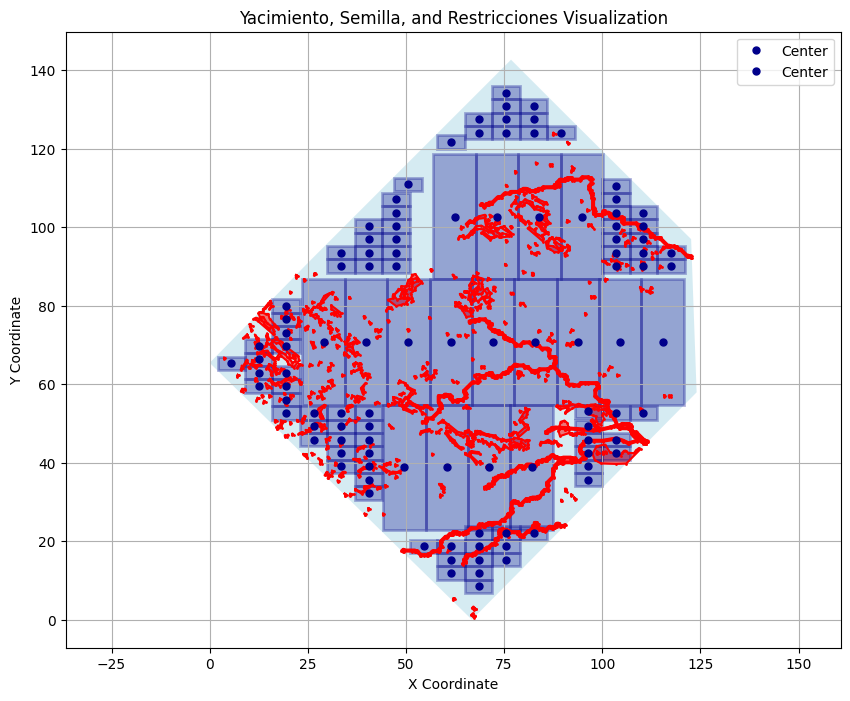

In [ ]:
fun_generacion_mapa(reduced_polygon, reduced_restrictions, mixed, reduced_size_flip, 0)

[(196.0, 241.75), (204.0, 401.25), (250.0, 241.75), (258.0, 401.25), (304.0, 241.75), (312.0, 401.25), (358.0, 241.75), (366.0, 401.25), (374.0, 560.75), (412.0, 241.75), (420.0, 401.25), (428.0, 560.75), (466.0, 241.75), (474.0, 401.25), (528.0, 401.25), (582.0, 401.25)]
[[(550.0, 6530.0), (1250.0, 5950.0), (1250.0, 6290.0), (1250.0, 6630.0), (1250.0, 6970.0), (1950.0, 5270.0), (1950.0, 5610.0), (1950.0, 5950.0), (1950.0, 6290.0), (1950.0, 6970.0), (1950.0, 7309.999999999999), (1950.0, 7650.0), (1950.0, 7990.000000000001), (2650.0, 4590.0), (2650.0, 4930.0), (2650.0, 5270.0), (3350.0, 3910.0), (3350.0, 4250.0), (3350.0, 4590.0), (3350.0, 4930.0), (3350.0, 5270.0), (3350.0, 9010.0), (3350.0, 9350.0), (4050.0, 3229.9999999999995), (4050.0, 3570.0000000000005), (4050.0, 3910.0), (4050.0, 4250.0), (4050.0, 4590.0), (4050.0, 4930.0), (4050.0, 5270.0), (4050.0, 9010.0), (4050.0, 9350.0), (4050.0, 9690.0), (4050.0, 10030.0), (4750.0, 9010.0), (4750.0, 9350.0), (4750.0, 9690.0), (4750.0, 1003

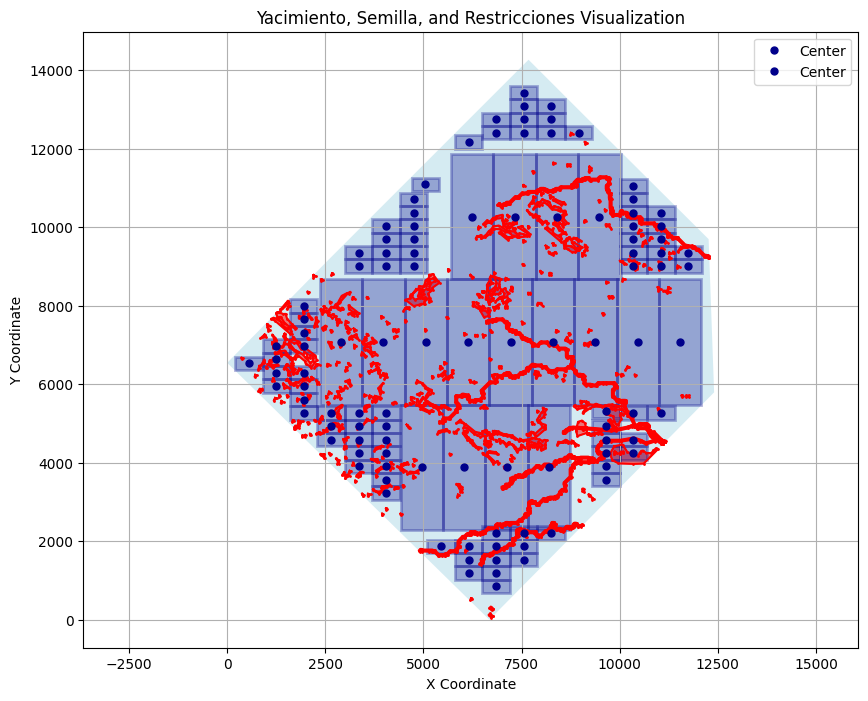

In [ ]:
b_pol, b_size, b_restr, b_rect = change_dimensions(reduced_polygon, reduced_size_flip, reduced_restrictions, 100, mixed)
print(sol)
print(b_rect)
fun_generacion_mapa(b_pol, b_restr, b_rect, b_size, 0)

([2450766.6537889075, 5915174.95134379], [2450851.50660265, 5914269.854663871], [2451091.9229082535, 5914510.270969475], [2451332.339213857, 5914750.687275078], [2451572.7555194604, 5914991.103580682], [2450865.648738274, 5913294.047305834], [2451106.065043877, 5913534.463611437], [2451346.4813494803, 5913774.8799170405], [2451586.897655084, 5914015.296222644], [2452067.7302662907, 5914496.128833851], [2452308.146571894, 5914736.545139454], [2452548.5628774976, 5914976.961445058], [2452788.979183101, 5915217.377750661], [2450879.7908738973, 5912318.239947796], [2451120.2071795007, 5912558.656253399], [2451360.623485104, 5912799.072559003], [2450893.933009521, 5911342.432589759], [2451134.3493151246, 5911582.848895363], [2451374.765620728, 5911823.265200966], [2451615.1819263315, 5912063.6815065695], [2451855.598231935, 5912304.097812173], [2454500.1775935725, 5914948.67717381], [2454740.593899176, 5915189.093479414], [2450908.075145145, 5910366.625231721], [2451148.4914507484, 5910607.

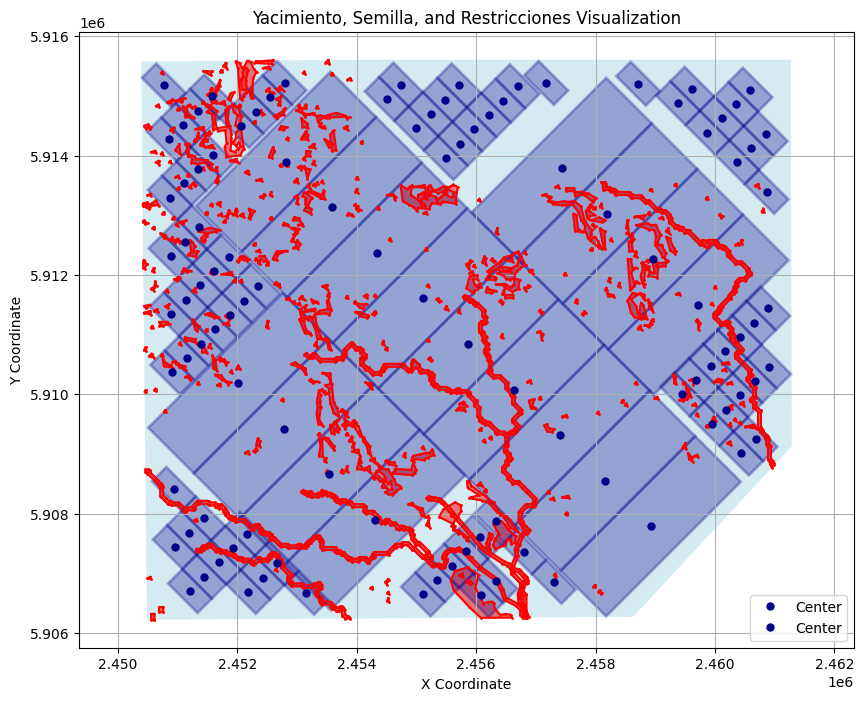

In [ ]:
r_pol, r_restr, r_rect, translation_vector_ = rotation(b_pol, b_restr, -45, b_rect, np.array((translation_vector[0], -translation_vector[1])))
fun_generacion_mapa(r_pol, r_restr, r_rect, b_size, -45)

In [ ]:
b_size_ = b_size[::-1]

In [ ]:
answer = inverse_answer_conversion(r_rect, len(r_rect), b_size_[0][1], b_size_[0][0], b_size_[1][1], b_size_[1][0])
compute_coverage_ratio(answer, r_pol)

0.8650964768510524

TypeError: object of type 'Polygon' has no len()

In [ ]:
calculate_area(b_pol, b_rect, b_size_)

0.27801617429530096